<a href="https://colab.research.google.com/github/ranjani5/customer-churn-prediction/blob/main/customer_churn_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
data = pd.read_csv('customer_churn.csv')
data.head()

,Names,Age,Total_Purchase,Account_Manager,Years,Num_Sites,Onboard_date,Location,Company,Churn
0,Cameron Williams,42.0,11066.80,0,7.22,8.0,2013-08-30 07:00:40,"10265 Elizabeth Mission Barkerburgh, AK 89518",Harvey LLC,1
1,Kevin Mueller,41.0,11916.22,0,6.50,11.0,2013-08-13 00:38:46,"6157 Frank Gardens Suite 019 Carloshaven, RI 1...",Wilson PLC,1
2,Eric Lozano,38.0,12884.75,0,6.67,12.0,2016-06-29 06:20:07,"1331 Keith Court Alyssahaven, DE 90114","Miller, Johnson and Wallace",1
3,Phillip White,42.0,8010.76,0,6.71,10.0,2014-04-22 12:43:12,"13120 Daniel Mount Angelabury, WY 30645-4695",Smith Inc,1
4,Cynthia Norton,37.0,9191.58,0,5.56,9.0,2016-01-19 15:31:15,"765 Tricia Row Karenshire, MH 71730",Love-Jones,1


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 900 entries, 0 to 899
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Names            900 non-null    object 
 1   Age              900 non-null    float64
 2   Total_Purchase   900 non-null    float64
 3   Account_Manager  900 non-null    int64  
 4   Years            900 non-null    float64
 5   Num_Sites        900 non-null    float64
 6   Onboard_date     900 non-null    object 
 7   Location         900 non-null    object 
 8   Company          900 non-null    object 
 9   Churn            900 non-null    int64  
dtypes: float64(4), int64(2), object(4)
memory usage: 56.3+ KB


### Exploratory Data Analysis : EDA

In [ ]:
data.isna().any()

Names              False
Age                False
Total_Purchase     False
Account_Manager    False
Years              False
Num_Sites          False
Onboard_date       False
Location           False
Company            False
Churn              False
dtype: bool

In [ ]:
col = list(data.columns) # Making a List of Column Names to Change Each Column Names to Camel Case.
col

['Names',
 'Age',
 'Total_Purchase',
 'Account_Manager',
 'Years',
 'Num_Sites',
 'Onboard_date',
 'Location',
 'Company',
 'Churn']

In [ ]:
data.columns

Index(['Names', 'Age', 'Total_Purchase', 'Account_Manager', 'Years',
       'Num_Sites', 'Onboard_date', 'Location', 'Company', 'Churn'],
      dtype='object')

In [ ]:
binary_features = []

for col in data.columns :
    if data[col].value_counts().shape[0] == 2 :
        binary_features.append(col)

print(f'Binary Feature: {binary_features}')

Binary Feature: ['Account_Manager', 'Churn']


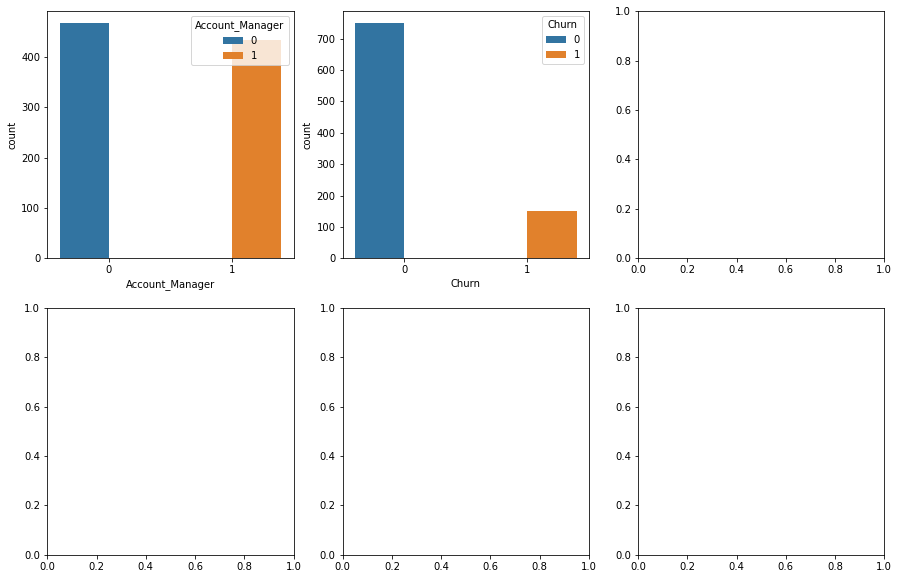

In [ ]:
fig, axes = plt.subplots(nrows = 2, ncols = 3, figsize = (15,10))

sns.countplot(x ='Account_Manager' , data = data, hue = 'Account_Manager', ax = axes[0,0])
sns.countplot(x = 'Churn', data = data, hue = 'Churn', ax = axes[0,1])

In [ ]:
data['Churn'].value_counts()

0    750
1    150
Name: Churn, dtype: int64

In [ ]:
data.groupby('Account_Manager')[['Churn']].mean()

,Churn
Account_Manager,
0,0.141328
1,0.193995


In [ ]:
list(data.select_dtypes('number').columns)

['Age', 'Total_Purchase', 'Account_Manager', 'Years', 'Num_Sites', 'Churn']

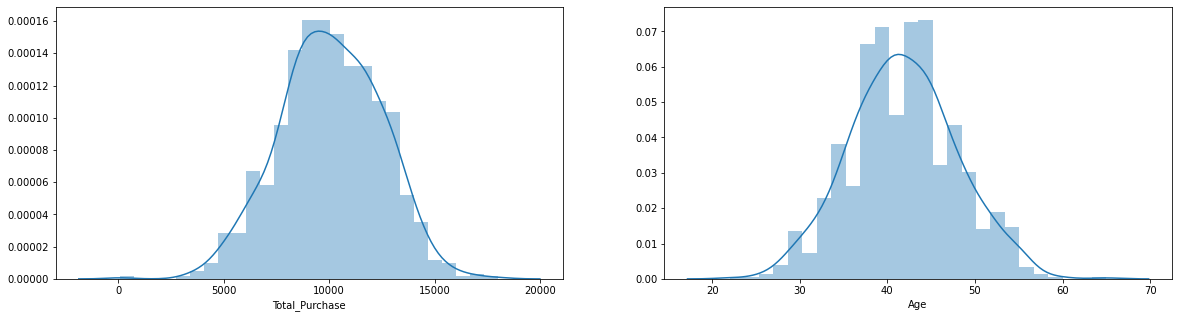

In [ ]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize = (20,5))

sns.distplot(data['Total_Purchase'], ax = axes[0])
sns.distplot(data['Age'], ax = axes[1]);

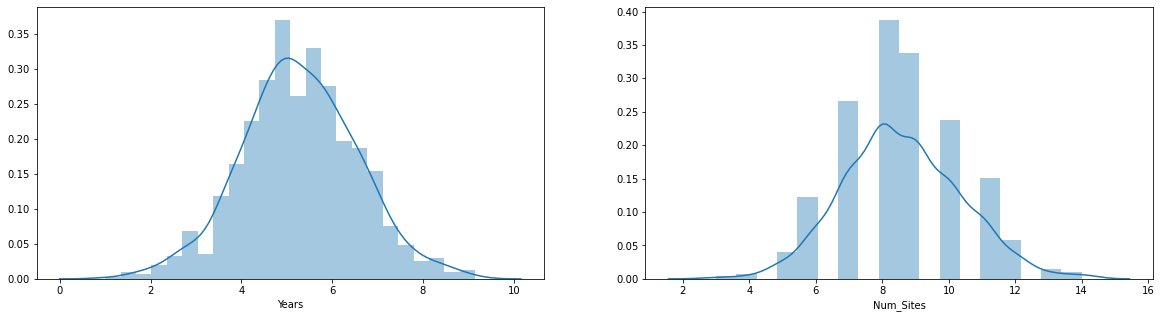

In [ ]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize = (20,5))

sns.distplot(data['Years'], ax = axes[0])
sns.distplot(data['Num_Sites'], ax = axes[1]);

## Data Preprocessing

Encoding Categorical Data to Numeric Data,
Scaling Continuous Variables

In [ ]:
categorical_columns = list(data.select_dtypes('object').columns)
categorical_columns

['Names', 'Onboard_date', 'Location', 'Company']

In [ ]:
X = pd.get_dummies(data, columns = categorical_columns, drop_first = True)
X.head()

,Age,Total_Purchase,Account_Manager,Years,Num_Sites,Churn,Names_Aaron Meyer,Names_Aaron West,Names_Abigail Gonzalez,Names_Abigail Jennings,...,"Company_Yates, Martinez and Cox",Company_Young and Sons,"Company_Young, Porter and Hill",Company_Young-Dunn,Company_Young-Newman,Company_Yu-Murillo,Company_Zamora-Cherry,Company_Zhang-Brown,Company_Zimmerman Group,"Company_Zuniga, Clark and Shaffer"
0,42.0,11066.80,0,7.22,8.0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,41.0,11916.22,0,6.50,11.0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,38.0,12884.75,0,6.67,12.0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,42.0,8010.76,0,6.71,10.0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,37.0,9191.58,0,5.56,9.0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


### Min Max Scaling

In [ ]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

X['Age'] = scaler.fit_transform(data[['Age']])

X['Total_Purchase'] = scaler.fit_transform(data[['Total_Purchase']])

X['Years'] = scaler.fit_transform(data[['Years']])

X['Num_Sites'] = scaler.fit_transform(data[['Num_Sites']])

X.head()

,Age,Total_Purchase,Account_Manager,Years,Num_Sites,Churn,Names_Aaron Meyer,Names_Aaron West,Names_Abigail Gonzalez,Names_Abigail Jennings,...,"Company_Yates, Martinez and Cox",Company_Young and Sons,"Company_Young, Porter and Hill",Company_Young-Dunn,Company_Young-Newman,Company_Yu-Murillo,Company_Zamora-Cherry,Company_Zhang-Brown,Company_Zimmerman Group,"Company_Zuniga, Clark and Shaffer"
0,0.465116,0.611781,0,0.763190,0.454545,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0.441860,0.659166,0,0.674847,0.727273,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0.372093,0.713196,0,0.695706,0.818182,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0.465116,0.441301,0,0.700613,0.636364,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0.348837,0.507173,0,0.559509,0.545455,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
data['Churn'].value_counts()

0    750
1    150
Name: Churn, dtype: int64

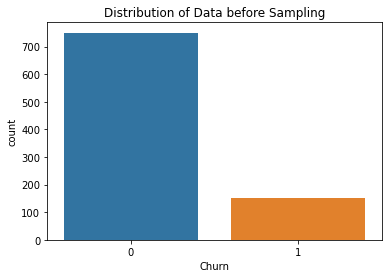

In [ ]:
sns.countplot('Churn', data = data).set_title('Distribution of Data before Sampling');

## Upsampling

In [ ]:
X_no = X[X['Churn'] == 0]

X_yes = X[X['Churn'] == 1]

print(f'No : {len(X_no)} | Yes : {len(X_yes)}')

No : 750 | Yes : 150


In [ ]:
X_yes_upsample = X_yes.sample(n = len(X_no), replace = True, random_state = 42)
print(f'Upsampled Yes : {len(X_yes_upsample)}')

Upsampled Yes : 750


In [ ]:
X = X_no.append(X_yes_upsample).reset_index(drop = True)

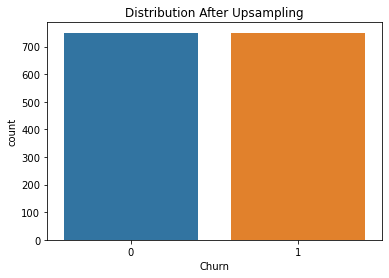

In [ ]:
sns.countplot('Churn', data = X).set_title('Distribution After Upsampling');

In [ ]:
X['Churn'].value_counts()

1    750
0    750
Name: Churn, dtype: int64

In [ ]:
# Split Data into Independent and Dependent Variables :
x = X.drop('Churn', axis = 1)
y = X['Churn']

# Train Test Split
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x,y,test_size = 0.2, random_state = 42)

## Data Modeling



## Ridge Classifier

In [ ]:
from sklearn.linear_model import RidgeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix

In [ ]:
ridge_classifier = RidgeClassifier().fit(x_train, y_train)

In [ ]:
y_prediction = ridge_classifier.predict(x_train)

print(f'Accuracy of Ridge Classifier on Train Set : {accuracy_score(y_train, y_prediction)*100:.2f}%')

Accuracy of Ridge Classifier on Train Set : 100.00%


In [ ]:
y_prediction = ridge_classifier.predict(x_test)

print(f'Accuracy of Ridge Classifier on Test Set : {accuracy_score(y_test, y_prediction)*100:.2f}%')

Accuracy of Ridge Classifier on Test Set : 98.00%


## Random Forest Classifier

trying another Different Model

In [ ]:
from sklearn.ensemble import RandomForestClassifier

rfc = RandomForestClassifier(n_estimators = 100, max_depth = 10).fit(x_train, y_train)

y_prediction = rfc.predict(x_train)

print(f'Accuracy of Random Forest Classifier on Train Set : {accuracy_score(y_train, y_prediction)*100:.2f}%')

y_prediction = rfc.predict(x_test)

print(f'Accuracy of Random Forest Classifier on Test Set : {accuracy_score(y_test, y_prediction)*100:.2f}%')

Accuracy of Random Forest Classifier on Train Set : 90.08%
Accuracy of Random Forest Classifier on Test Set : 85.00%


## Grid Search Cross Validation

To Improve the Model applying GridSearch

In [ ]:
from sklearn.model_selection import GridSearchCV

parameters  = {'n_estimators' : [150, 200, 250, 300], 'max_depth' : [15, 20, 25]}

gsv_rfc = GridSearchCV(estimator = rfc, param_grid = parameters, n_jobs = -1, cv = 5).fit(x_train,y_train)

In [ ]:
# Best Parameters :

gsv_rfc.best_params_

{'max_depth': 25, 'n_estimators': 200}

In [ ]:
# Best Score :

print(f'Best Accuracy Score obtained from Grid Search Cross Validation : {gsv_rfc.best_score_*100:.2f}%')

Best Accuracy Score obtained from Grid Search Cross Validation : 90.83%


In [ ]:
gsv_rfc = GridSearchCV(estimator = rfc, param_grid = parameters, n_jobs = -1, cv = 5).fit(x,y)

print(f'Best Accuracy Score obtained from Grid Search Cross Validation : {gsv_rfc.best_score_*100:.2f}%')

Best Accuracy Score obtained from Grid Search Cross Validation : 92.67%


We Have Achieved an Overall Accuracy of 92.27%

The Mean Cross Validated Score of The Best Estimator,